In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
rtdetr_r18_data = {}
rtdetr_r50_data = {}
for thresh in np.arange(0, 11):
    rtdetr_r18_data[f'rtdetr_r18_thresh{thresh}0'] = pd.read_csv(f'rtdetr_r18_thresh{thresh}0_samples100.csv')
    rtdetr_r18_data[f'rtdetr_r18_thresh{thresh}0']['thresh'] = [int(f'{thresh}0')] * 100
    
    rtdetr_r50_data[f'rtdetr_r50_thresh{thresh}0'] = pd.read_csv(f'rtdetr_r50_thresh{thresh}0_samples100.csv')
    rtdetr_r50_data[f'rtdetr_r50_thresh{thresh}0']['thresh'] = [int(f'{thresh}0')] * 100

rtdetr_r18 = pd.concat([ table for table in rtdetr_r18_data.values() ])
rtdetr_r50 = pd.concat([ table for table in rtdetr_r50_data.values() ])

In [3]:
yolov8_n_data = {}
yolov8_s_data = {}
yolov8_m_data = {}
for thresh in np.arange(0, 11):
    yolov8_n_data[f'yolov8_n_thresh{thresh}0'] = pd.read_csv(f'yolov8_n_thresh{thresh}0_samples100.csv')
    yolov8_n_data[f'yolov8_n_thresh{thresh}0']['thresh'] = [int(f'{thresh}0')] * 100
    
    yolov8_s_data[f'yolov8_s_thresh{thresh}0'] = pd.read_csv(f'yolov8_s_thresh{thresh}0_samples100.csv')
    yolov8_s_data[f'yolov8_s_thresh{thresh}0']['thresh'] = [int(f'{thresh}0')] * 100
    
    yolov8_m_data[f'yolov8_m_thresh{thresh}0'] = pd.read_csv(f'yolov8_m_thresh{thresh}0_samples100.csv')
    yolov8_m_data[f'yolov8_m_thresh{thresh}0']['thresh'] = [int(f'{thresh}0')] * 100

yolov8_n = pd.concat([ table for table in yolov8_n_data.values() ])
yolov8_s = pd.concat([ table for table in yolov8_s_data.values() ])
yolov8_m = pd.concat([ table for table in yolov8_m_data.values() ])

In [4]:
yolov11_n_data = {}
yolov11_s_data = {}
yolov11_m_data = {}
for thresh in np.arange(0, 11):
    yolov11_n_data[f'yolov11_n_thresh{thresh}0'] = pd.read_csv(f'yolov11_n_thresh{thresh}0_samples100.csv')
    yolov11_n_data[f'yolov11_n_thresh{thresh}0']['thresh'] = [int(f'{thresh}0')] * 100
    
    yolov11_s_data[f'yolov11_s_thresh{thresh}0'] = pd.read_csv(f'yolov11_s_thresh{thresh}0_samples100.csv')
    yolov11_s_data[f'yolov11_s_thresh{thresh}0']['thresh'] = [int(f'{thresh}0')] * 100
    
    yolov11_m_data[f'yolov11_m_thresh{thresh}0'] = pd.read_csv(f'yolov11_m_thresh{thresh}0_samples100.csv')
    yolov11_m_data[f'yolov11_m_thresh{thresh}0']['thresh'] = [int(f'{thresh}0')] * 100

yolov11_n = pd.concat([ table for table in yolov11_n_data.values() ])
yolov11_s = pd.concat([ table for table in yolov11_s_data.values() ])
yolov11_m = pd.concat([ table for table in yolov11_m_data.values() ])

### RT-DETR Data Analysis

In [5]:
def get_mean_diffs(table):
    mean_diffs = []
    
    mean_diffs.append(table[ table['thresh'] == 00 ].time_diff.mean() * 1000)
    mean_diffs.append(table[ table['thresh'] == 10 ].time_diff.mean() * 1000)
    mean_diffs.append(table[ table['thresh'] == 20 ].time_diff.mean() * 1000)
    mean_diffs.append(table[ table['thresh'] == 30 ].time_diff.mean() * 1000)
    mean_diffs.append(table[ table['thresh'] == 40 ].time_diff.mean() * 1000)
    mean_diffs.append(table[ table['thresh'] == 50 ].time_diff.mean() * 1000)
    mean_diffs.append(table[ table['thresh'] == 60 ].time_diff.mean() * 1000)
    mean_diffs.append(table[ table['thresh'] == 70 ].time_diff.mean() * 1000)
    mean_diffs.append(table[ table['thresh'] == 80 ].time_diff.mean() * 1000)
    mean_diffs.append(table[ table['thresh'] == 90 ].time_diff.mean() * 1000)
    mean_diffs.append(table[ table['thresh'] == 100 ].time_diff.mean() * 1000)
    
    return mean_diffs

def get_mean_dets(table):
    mean_dets = []
    
    mean_dets.append(table[ table['thresh'] == 00 ].n_detections.mean())
    mean_dets.append(table[ table['thresh'] == 10 ].n_detections.mean())
    mean_dets.append(table[ table['thresh'] == 20 ].n_detections.mean())
    mean_dets.append(table[ table['thresh'] == 30 ].n_detections.mean())
    mean_dets.append(table[ table['thresh'] == 40 ].n_detections.mean())
    mean_dets.append(table[ table['thresh'] == 50 ].n_detections.mean())
    mean_dets.append(table[ table['thresh'] == 60 ].n_detections.mean())
    mean_dets.append(table[ table['thresh'] == 70 ].n_detections.mean())
    mean_dets.append(table[ table['thresh'] == 80 ].n_detections.mean())
    mean_dets.append(table[ table['thresh'] == 90 ].n_detections.mean())
    mean_dets.append(table[ table['thresh'] == 100 ].n_detections.mean())
    
    return mean_dets

In [6]:
def remove_0_idxs(table):
    new_table = table.drop(index=0)
    new_table.reset_index(drop=True, inplace=True)
    return new_table

# remove all index == 0 to account for module startup timings
rtdetr_r18_clean = remove_0_idxs(rtdetr_r18)
rtdetr_r50_clean = remove_0_idxs(rtdetr_r50)

rtdetr_r18_clean['model'] = 'rtdetr_r18'
rtdetr_r50_clean['model'] = 'rtdetr_r50'

rtdetrs = pd.concat([rtdetr_r18_clean, rtdetr_r50_clean])

In [7]:
df1 = rtdetrs.groupby(by=['thresh', 'model']).time_diff.mean().reset_index()
df2 = rtdetrs.groupby(by=['thresh', 'model']).n_detections.mean().reset_index()
rtdetrs = df1.merge(df2, how='outer', on=['thresh', 'model'])
rtdetrs = rtdetrs.rename(columns={'time_diff':'mean_diff (sec)', 'n_detections':'mean_dets'})

In [8]:
rtdetrs['dets/sec'] = rtdetrs['mean_dets'] / rtdetrs['mean_diff (sec)']
rtdetrs

,thresh,model,mean_diff (sec),mean_dets,dets/sec
0,0,rtdetr_r18,0.523172,300.000000,573.425001
1,0,rtdetr_r50,0.539106,300.000000,556.476346
2,10,rtdetr_r18,0.523763,62.111111,118.586301
3,10,rtdetr_r50,0.539010,49.868687,92.519102
4,20,rtdetr_r18,0.523687,20.060606,38.306497
5,20,rtdetr_r50,0.539029,18.474747,34.274141
6,30,rtdetr_r18,0.522793,9.787879,18.722268
7,30,rtdetr_r50,0.539191,9.747475,18.077955
8,40,rtdetr_r18,0.522291,5.818182,11.139732
9,40,rtdetr_r50,0.538981,6.555556,12.162876


<Axes: xlabel='thresh', ylabel='mean_diff (sec)'>

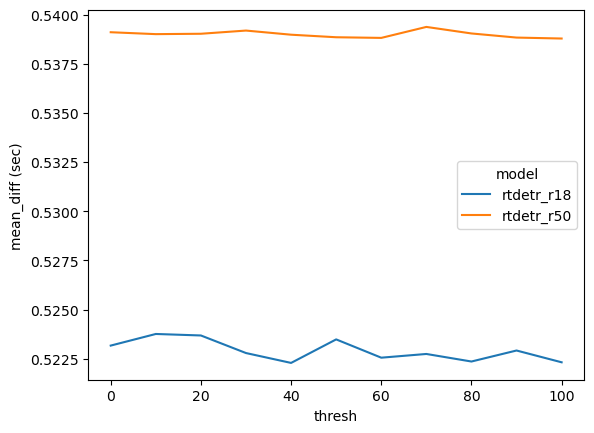

In [9]:
sns.lineplot(data=rtdetrs, x='thresh', y='mean_diff (sec)', hue='model')

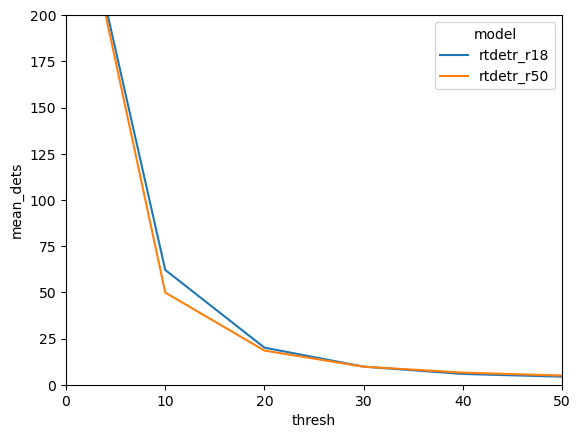

In [10]:
sns.lineplot(data=rtdetrs, x='thresh', y='mean_dets', hue='model')
plt.xlim(0, 50)
plt.ylim(0, 200)
plt.show()

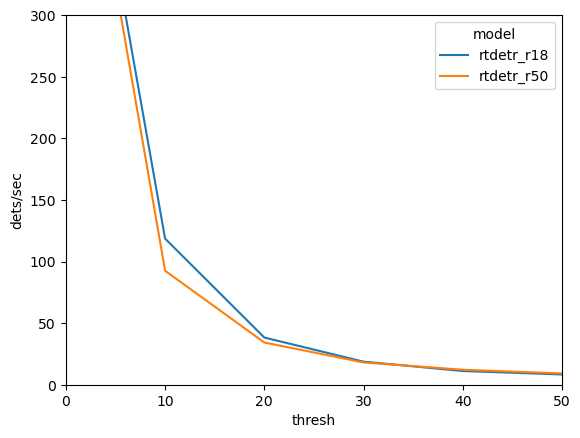

In [11]:
sns.lineplot(data=rtdetrs, x='thresh', y='dets/sec', hue='model')
plt.xlim(0, 50)
plt.ylim(0, 300)
plt.show()

### YOLOv8 Data Analysis

In [12]:
# remove all index == 0 to account for module startup timings
yolov8_n_clean = remove_0_idxs(yolov8_n)
yolov8_s_clean = remove_0_idxs(yolov8_s)
yolov8_m_clean = remove_0_idxs(yolov8_m)

yolov8_n_clean['model'] = 'yolov8_n'
yolov8_s_clean['model'] = 'yolov8_s'
yolov8_m_clean['model'] = 'yolov8_m'

yolov8s = pd.concat([yolov8_n_clean, yolov8_s_clean, yolov8_m_clean])

In [13]:
df1 = yolov8s.groupby(by=['thresh', 'model']).time_diff.mean().reset_index()
df2 = yolov8s.groupby(by=['thresh', 'model']).n_detections.mean().reset_index()
yolov8s = df1.merge(df2, how='outer', on=['thresh', 'model'])
yolov8s = yolov8s.rename(columns={'time_diff':'mean_diff (sec)', 'n_detections':'mean_dets'})

In [14]:
yolov8s['dets/sec'] = yolov8s['mean_dets'] / yolov8s['mean_diff (sec)']
yolov8s

,thresh,model,mean_diff (sec),mean_dets,dets/sec
0,0,yolov8_m,0.521063,300.000000,575.746635
1,0,yolov8_n,0.509584,300.000000,588.715882
2,0,yolov8_s,0.511437,300.000000,586.582449
3,10,yolov8_m,0.520151,10.767677,20.701055
4,10,yolov8_n,0.508377,9.484848,18.657119
5,10,yolov8_s,0.510173,10.494949,20.571355
6,20,yolov8_m,0.519954,7.141414,13.734710
7,20,yolov8_n,0.508365,5.363636,10.550749
8,20,yolov8_s,0.510158,6.545455,12.830255
9,30,yolov8_m,0.519944,5.323232,10.238088


<Axes: xlabel='thresh', ylabel='mean_diff (sec)'>

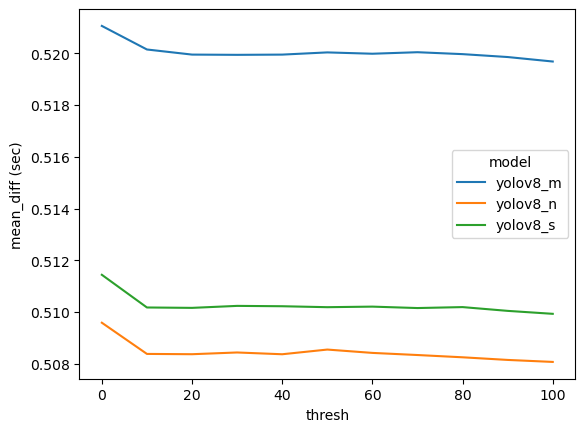

In [15]:
sns.lineplot(data=yolov8s, x='thresh', y='mean_diff (sec)', hue='model')

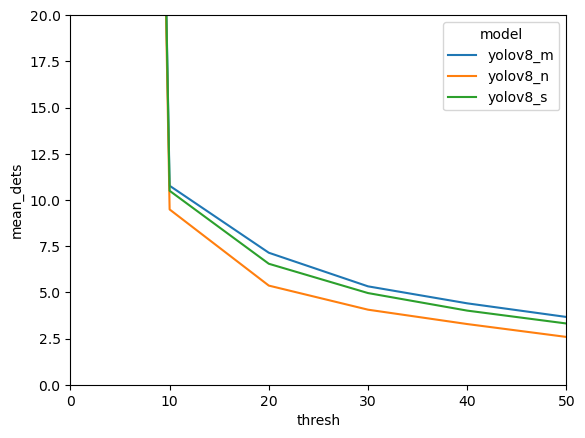

In [16]:
sns.lineplot(data=yolov8s, x='thresh', y='mean_dets', hue='model')
plt.xlim(0, 50)
plt.ylim(0, 20)
plt.show()

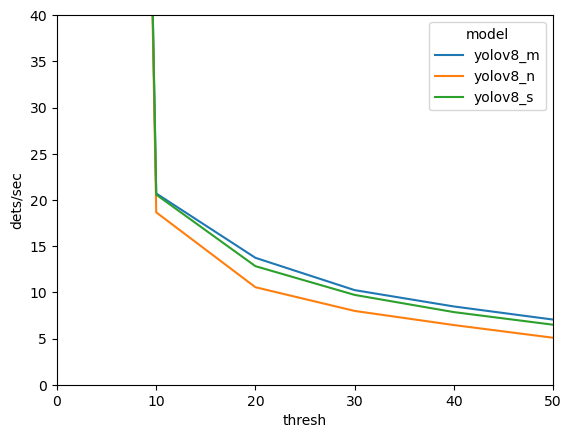

In [17]:
sns.lineplot(data=yolov8s, x='thresh', y='dets/sec', hue='model')
plt.xlim(0, 50)
plt.ylim(0, 40)
plt.show()

### YOLOv11 Data Analysis

In [18]:
# remove all index == 0 to account for module startup timings
yolov11_n_clean = remove_0_idxs(yolov11_n)
yolov11_s_clean = remove_0_idxs(yolov11_s)
yolov11_m_clean = remove_0_idxs(yolov11_m)

yolov11_n_clean['model'] = 'yolov11_n'
yolov11_s_clean['model'] = 'yolov11_s'
yolov11_m_clean['model'] = 'yolov11_m'

yolov11s = pd.concat([yolov11_n_clean, yolov11_s_clean, yolov11_m_clean])

In [19]:
df1 = yolov11s.groupby(by=['thresh', 'model']).time_diff.mean().reset_index()
df2 = yolov11s.groupby(by=['thresh', 'model']).n_detections.mean().reset_index()
yolov11s = df1.merge(df2, how='outer', on=['thresh', 'model'])
yolov11s = yolov11s.rename(columns={'time_diff':'mean_diff (sec)', 'n_detections':'mean_dets'})

In [20]:
yolov11s['dets/sec'] = yolov11s['mean_dets'] / yolov11s['mean_diff (sec)']
yolov11s

,thresh,model,mean_diff (sec),mean_dets,dets/sec
0,0,yolov11_m,0.521292,300.000000,575.492852
1,0,yolov11_n,0.510079,300.000000,588.144072
2,0,yolov11_s,0.511941,300.000000,586.004532
3,10,yolov11_m,0.520460,9.282828,17.835804
4,10,yolov11_n,0.508988,8.464646,16.630344
5,10,yolov11_s,0.510741,9.545455,18.689428
6,20,yolov11_m,0.520268,6.545455,12.580921
7,20,yolov11_n,0.508973,4.979798,9.784007
8,20,yolov11_s,0.510698,6.010101,11.768394
9,30,yolov11_m,0.520212,5.151515,9.902719


<Axes: xlabel='thresh', ylabel='mean_diff (sec)'>

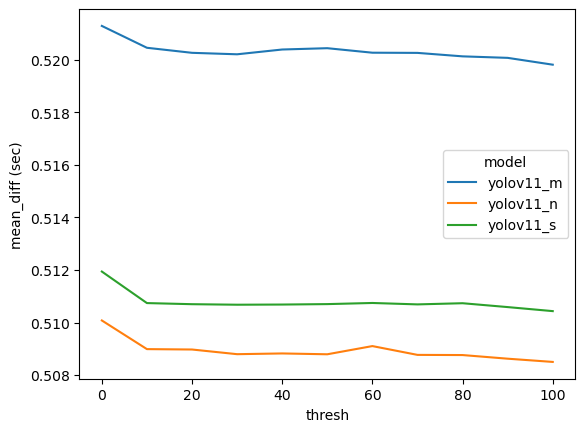

In [21]:
sns.lineplot(data=yolov11s, x='thresh', y='mean_diff (sec)', hue='model')

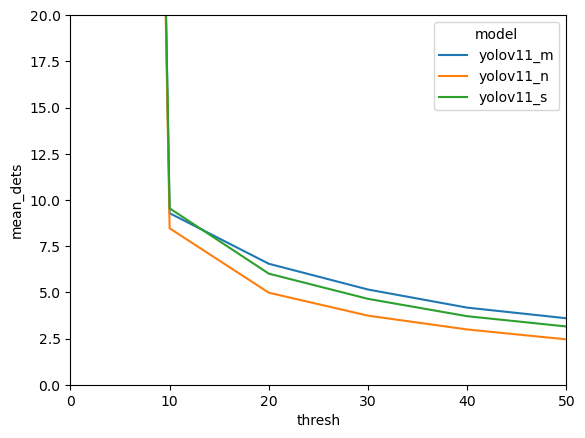

In [22]:
sns.lineplot(data=yolov11s, x='thresh', y='mean_dets', hue='model')
plt.xlim(0, 50)
plt.ylim(0, 20)
plt.show()

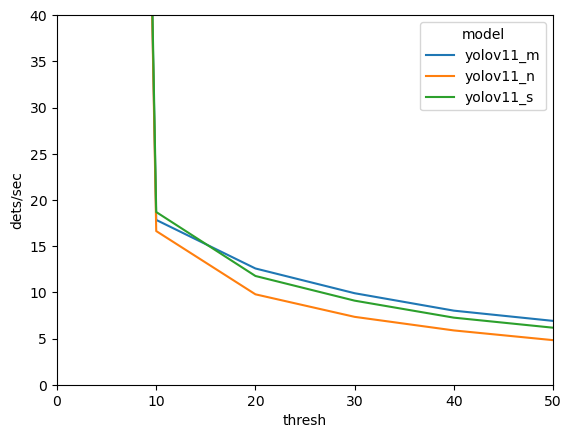

In [23]:
sns.lineplot(data=yolov11s, x='thresh', y='dets/sec', hue='model')
plt.xlim(0, 50)
plt.ylim(0, 40)
plt.show()

## Module Comparison

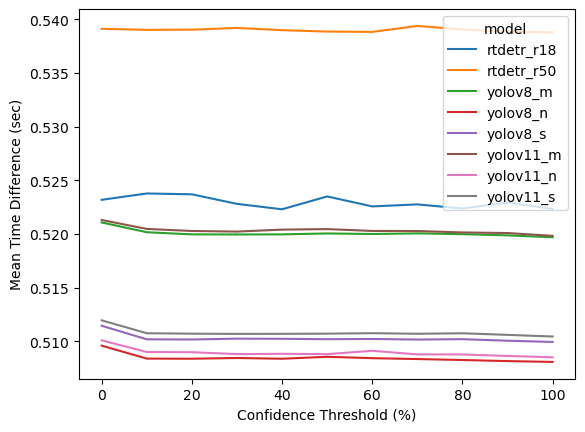

In [29]:
df = pd.concat([rtdetrs, yolov8s, yolov11s])

plt.xlabel('Confidence Threshold (%)')
plt.ylabel('Mean Time Difference (sec)')
sns.lineplot(data=df, x='thresh', y='mean_diff (sec)', hue='model')
plt.savefig('mean_time_diff.png')
plt.show()

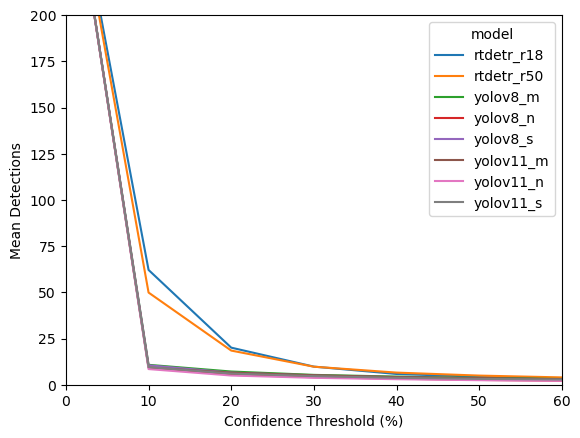

In [25]:
plt.xlabel('Confidence Threshold (%)')
plt.ylabel('Mean Detections')
sns.lineplot(data=df, x='thresh', y='mean_dets', hue='model')
plt.xlim(0, 60)
plt.ylim(0, 200)
plt.savefig('mean_detections.png')
plt.show()

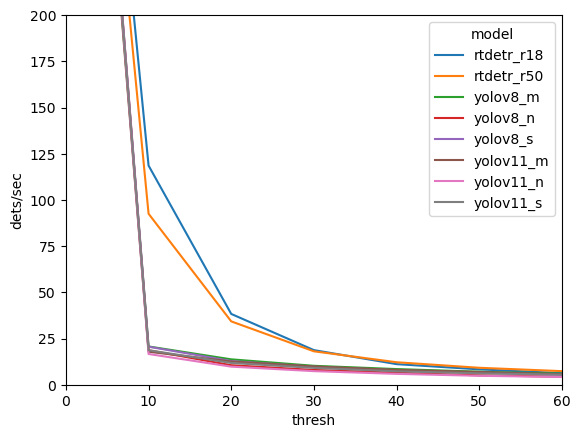

In [26]:
sns.lineplot(data=df, x='thresh', y='dets/sec', hue='model')
plt.xlim(0, 60)
plt.ylim(0, 200)
plt.savefig('detections_per_second.png')
plt.show()

In [27]:
df[ df['thresh'] == 60 ].sort_values(by='dets/sec', ascending=False)

,thresh,model,mean_diff (sec),mean_dets,dets/sec
13,60,rtdetr_r50,0.538818,3.959596,7.348667
12,60,rtdetr_r18,0.522557,3.272727,6.262906
18,60,yolov8_m,0.519987,3.101010,5.963631
18,60,yolov11_m,0.520273,2.979798,5.727377
20,60,yolov11_s,0.510745,2.787879,5.458457
20,60,yolov8_s,0.510206,2.747475,5.385030
19,60,yolov8_n,0.508416,2.202020,4.331138
19,60,yolov11_n,0.509104,2.131313,4.186403
